In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../course_notebooks/DATA/airline_tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

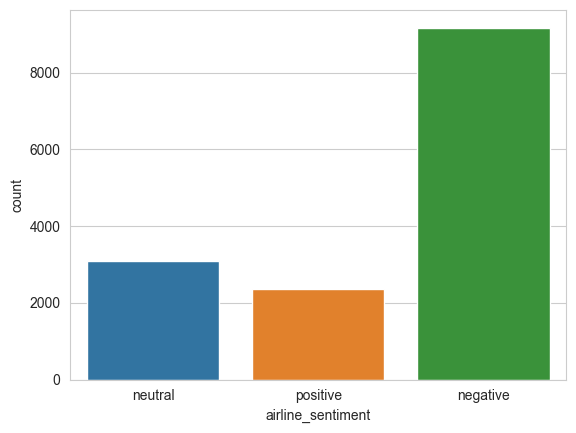

In [4]:
sns.countplot(df,x='airline_sentiment')

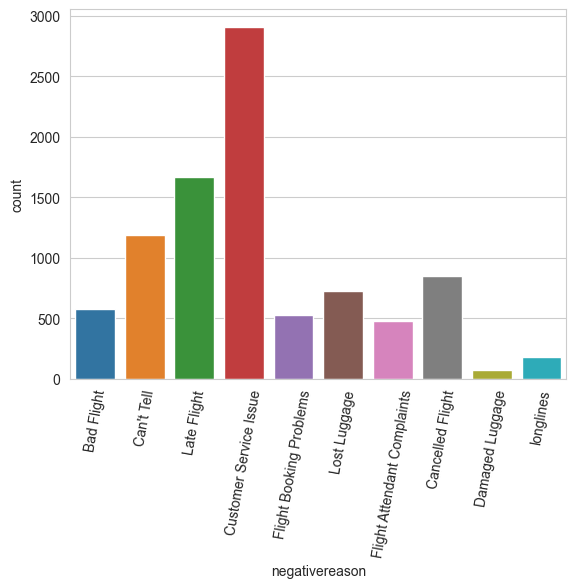

In [10]:
sns.countplot(df,x='negativereason')
plt.xticks(rotation=80);

<AxesSubplot:xlabel='airline', ylabel='count'>

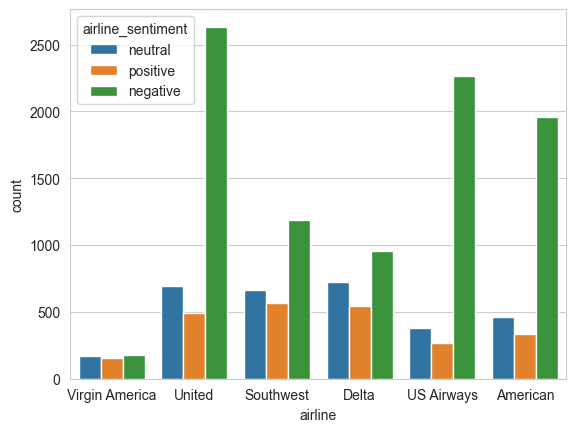

In [12]:
sns.countplot(df,x='airline',hue='airline_sentiment')

In [14]:
data = df[['airline_sentiment','text']]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [16]:
x = data['text']
y = data['airline_sentiment']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(x_train)
x_train_tfidf = tfidf.transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_tfidf,y_train)


MultinomialNB()

In [19]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [20]:
from sklearn.svm import SVC
rbf_svc = SVC()
rbf_svc.fit(x_train_tfidf,y_train)

SVC()

In [22]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [25]:
def report(model):
    preds = model.predict(x_test_tfidf)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay(confusion_matrix(y_test,preds)).plot()

              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      2738
     neutral       0.64      0.47      0.54       947
    positive       0.81      0.57      0.67       707

    accuracy                           0.77      4392
   macro avg       0.75      0.66      0.69      4392
weighted avg       0.77      0.77      0.76      4392



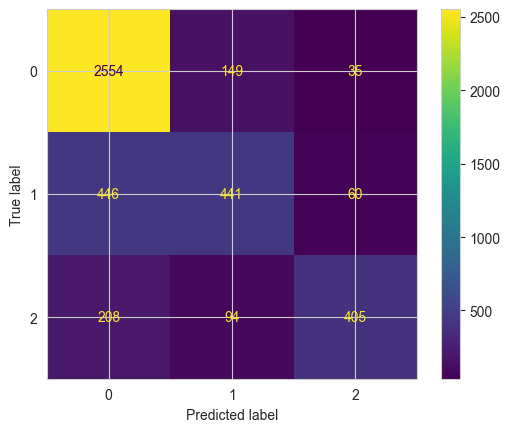

In [26]:
report(log_model)

              precision    recall  f1-score   support

    negative       0.78      0.95      0.85      2738
     neutral       0.69      0.39      0.50       947
    positive       0.81      0.56      0.66       707

    accuracy                           0.77      4392
   macro avg       0.76      0.64      0.67      4392
weighted avg       0.76      0.77      0.75      4392



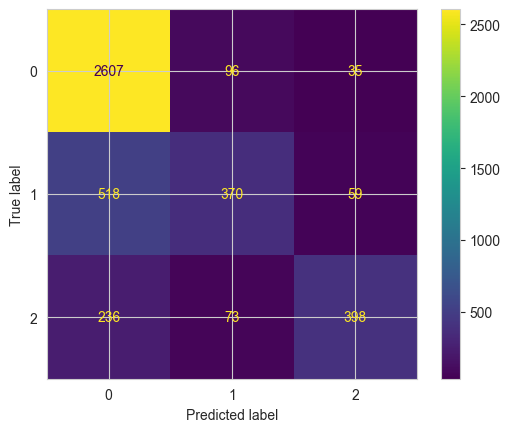

In [27]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.66      0.99      0.80      2738
     neutral       0.78      0.15      0.25       947
    positive       0.91      0.15      0.26       707

    accuracy                           0.68      4392
   macro avg       0.78      0.43      0.43      4392
weighted avg       0.73      0.68      0.59      4392



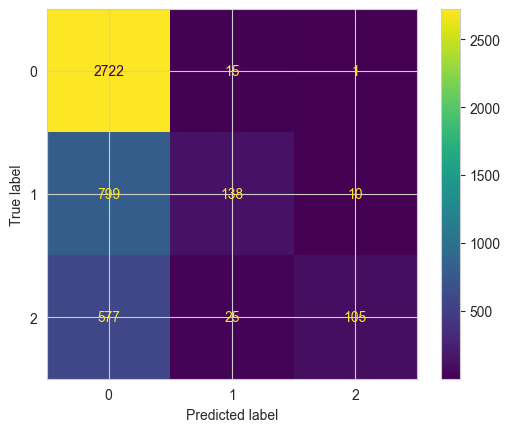

In [28]:
report(nb)

In [29]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('svc',SVC())])
pipe.fit(x,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [32]:
print(pipe.predict(['This airline is terrible']))
print(pipe.predict(['ok flight']))
print(pipe.predict(['very very good flight']))


['negative']
['neutral']
['positive']
